In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../input/house-price-prediction-dataset-81-columns/house_dataset.csv")


In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1314, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   int64  
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1084 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          83 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBuil

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       230
LotArea             0
Street              0
Alley            1231
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           31
BsmtCond           31
BsmtExposure       32
BsmtFinType1       31
BsmtFinSF1          0
BsmtFinType2       32
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
missing_value_percentage=df.isnull().sum()/df.shape[0]*100
missing_value_percentage

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.503805
LotArea           0.000000
Street            0.000000
Alley            93.683409
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.532725
MasVnrArea        0.532725
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.359209
BsmtCond          2.359209
BsmtExposure      2.435312
BsmtFinType1      2.359209
BsmtFinSF1        0.000000
BsmtFinType2      2.435312
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [10]:
# finding columns in which missing column values have more than 20% data missing
drop_columns=missing_value_percentage[missing_value_percentage>20].keys()
drop_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [11]:
df2=df.drop(columns=drop_columns)

In [12]:
df2.shape

(1314, 75)

In [13]:
df_num=df2.select_dtypes(include=['int64','float64'])

In [14]:
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
8,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000
9,60,85.0,11924,9,5,2005,2006,286.0,998,0,177,1175,1182,1142,0,2324,1,0,3,0,4,1,11,2,2005.0,3,736,147,21,0,0,0,0,0,7,2006,345000


<AxesSubplot:>

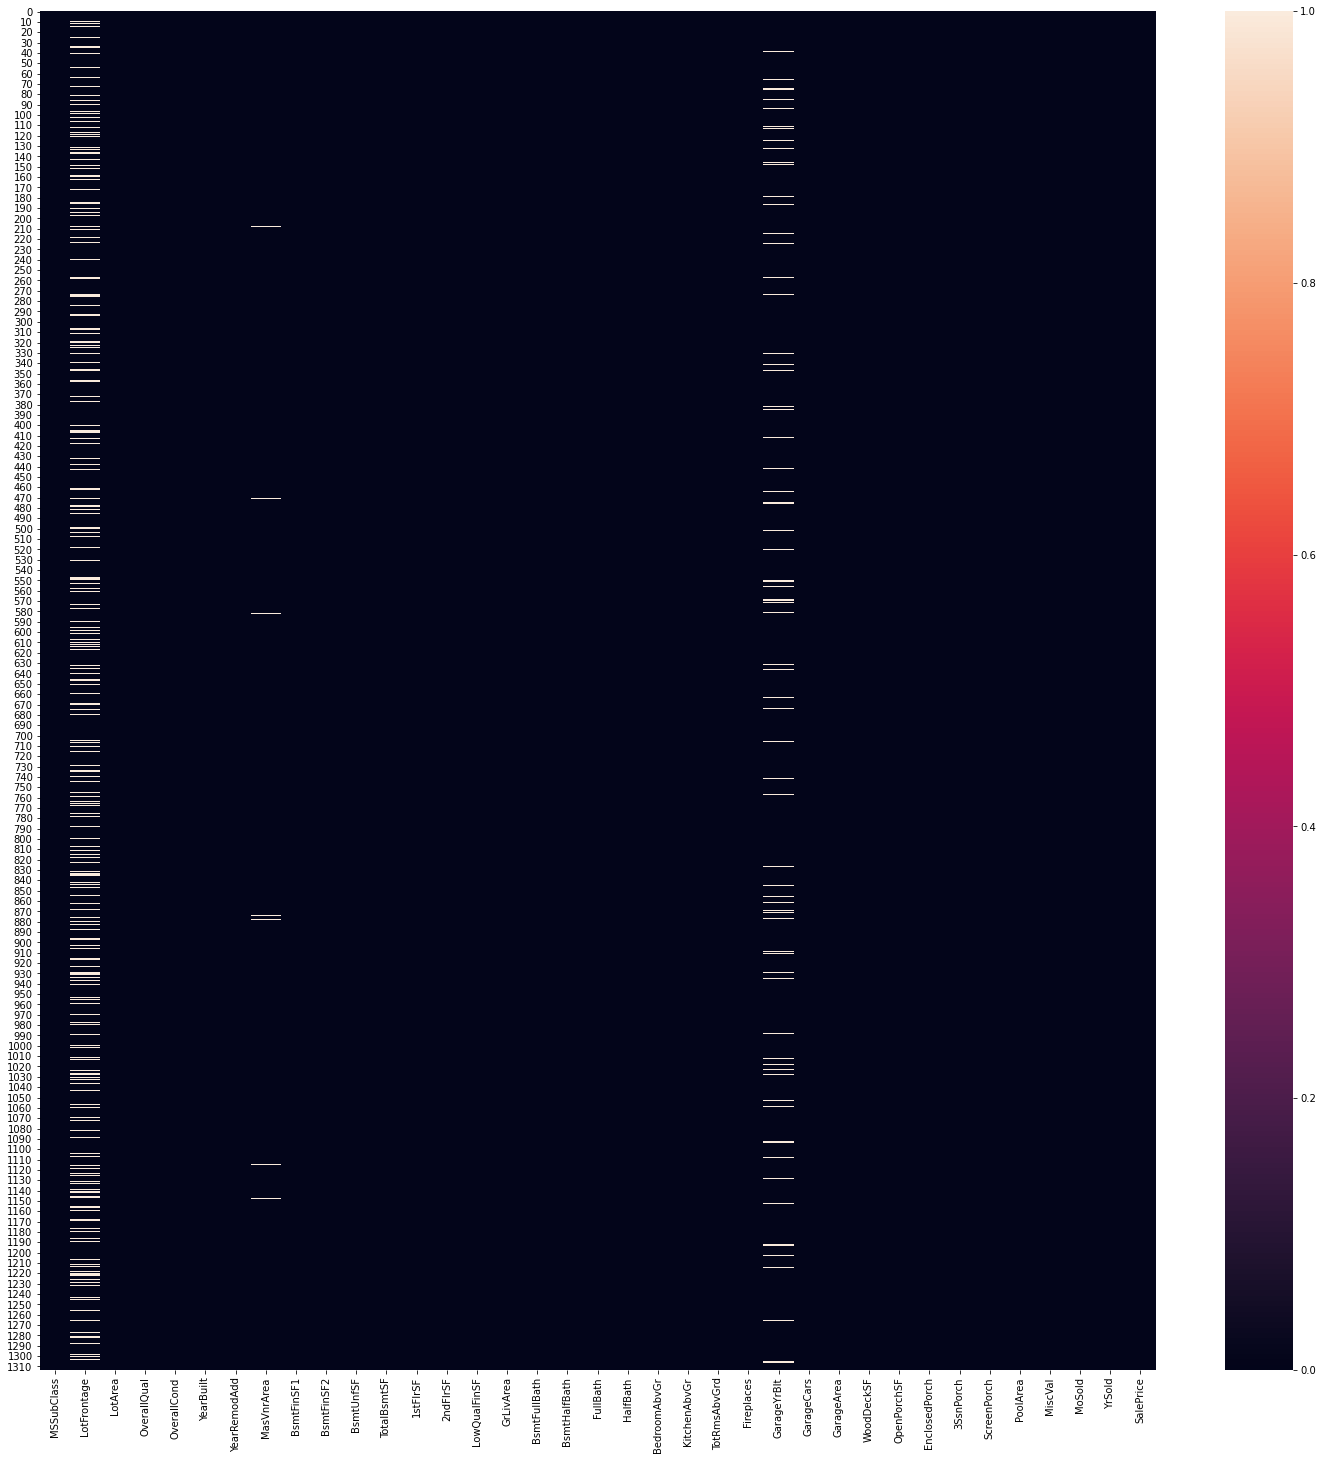

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df_num.isnull())

In [16]:
df_num[df_num.isnull().any(axis=1)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
10,20,NaN,12968,5,6,1962,1962,0.0,737,0,175,912,912,0,0,912,1,0,1,0,2,1,4,0,1962.0,1,352,140,0,0,0,176,0,0,9,2008,144000
12,20,NaN,10920,6,5,1960,1960,212.0,733,0,520,1253,1253,0,0,1253,1,0,1,1,2,1,5,1,1960.0,1,352,0,213,176,0,0,0,0,5,2008,157000
14,20,NaN,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,700,3,2010,149000
25,20,NaN,8544,5,6,1966,2006,0.0,0,0,1228,1228,1228,0,0,1228,0,0,1,1,3,1,6,0,1966.0,1,271,0,65,0,0,0,0,0,6,2008,149350
34,85,NaN,9180,5,7,1983,1983,0.0,747,93,0,840,884,0,0,884,1,0,1,0,2,1,5,0,1983.0,2,504,240,0,0,0,0,0,0,12,2007,144000
35,20,NaN,9200,5,6,1975,1980,0.0,280,491,167,938,938,0,0,938,1,0,1,0,3,1,5,0,1977.0,1,308,145,0,0,0,0,0,0,7,2008,130250
39,190,33.0,4456,4,5,1920,2008,0.0,0,0,736,736,736,716,0,1452,0,0,2,0,2,3,8,0,NaN,0,0,0,0,102,0,0,0,0,6,2009,113000
41,60,NaN,13869,6,6,1997,1997,0.0,182,0,612,794,794,676,0,1470,0,1,2,0,3,1,6,0,1997.0,2,388,0,75,0,0,0,0,0,7,2007,177000
54,60,NaN,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.0,2,645,576,36,0,0,0,0,0,2,2009,219500
64,20,NaN,8475,4,7,1956,1956,0.0,228,0,724,952,952,0,0,952,0,0,1,0,2,1,4,0,1956.0,1,283,0,0,0,0,0,0,0,4,2008,135750


In [17]:
missing_num_var=[var for var in df_num.columns if df_num[var].isnull().sum()>0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

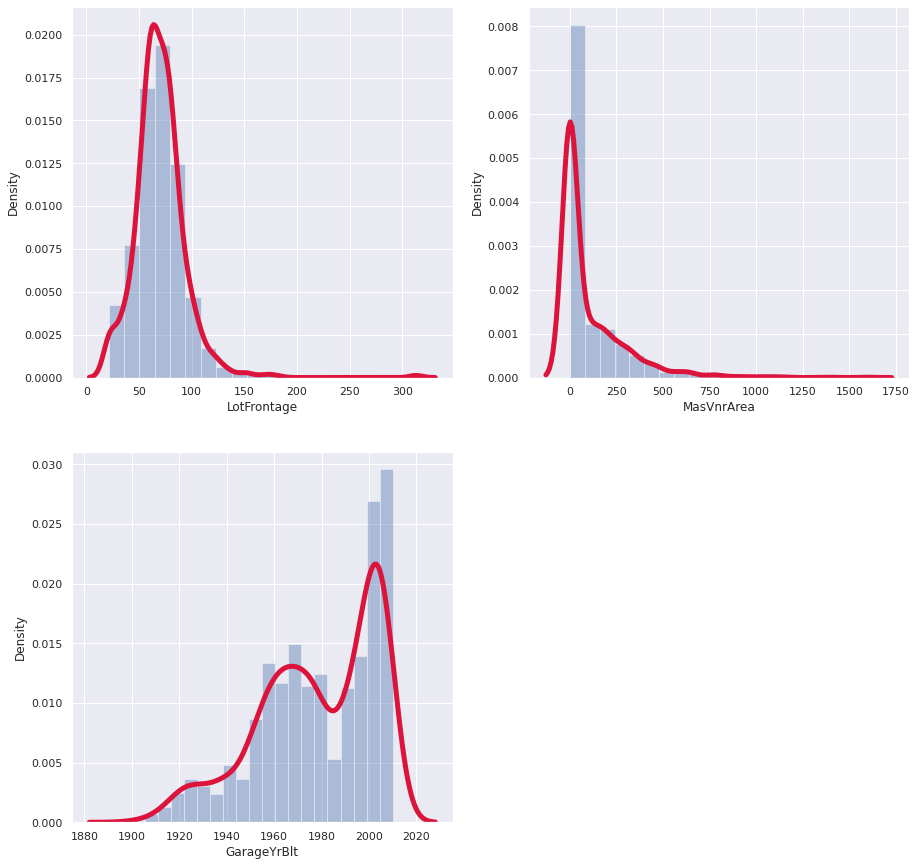

In [19]:
plt.figure(figsize=(15,15))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={'linewidth': 5,'color':'#DC143C'})

In [20]:
df4_num_mean=df_num.fillna(df_num.mean())

In [21]:
df4_num_mean.isnull().sum().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

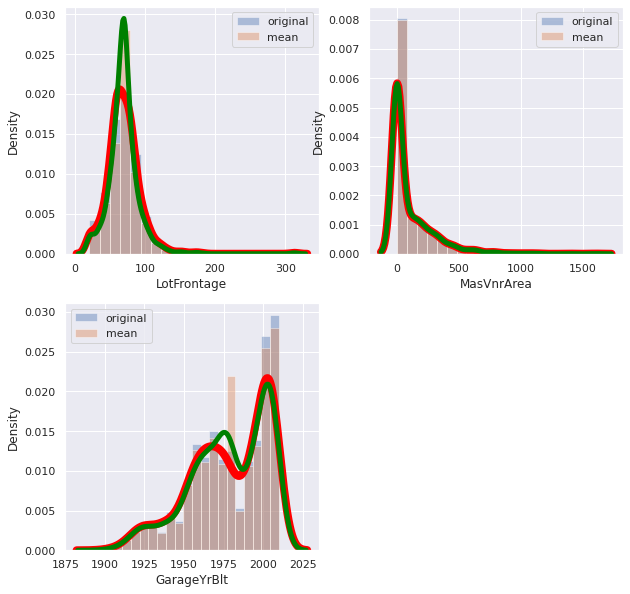

In [22]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={'linewidth': 8,'color':'red'},label="original")
    sns.distplot(df4_num_mean[var],bins=20,kde_kws={'linewidth': 5,'color':'green'},label="mean")
    plt.legend()

In [23]:
df5_num_median=df_num.fillna(df_num.median())
df5_num_median.isnull().sum().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

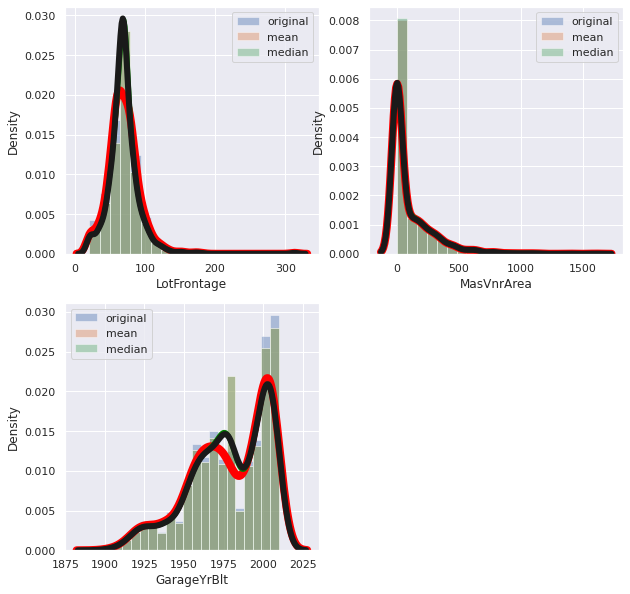

In [24]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[var],bins=20,kde_kws={'linewidth': 8,'color':'red'},label="original")
    sns.distplot(df4_num_mean[var],bins=20,kde_kws={'linewidth': 5,'color':'green'},label="mean")
    sns.distplot(df5_num_median[var],bins=20,kde_kws={'linewidth': 6,'color':'k'},label="median")
    plt.legend()